# Summary

This notebook loads and plots the results presented in Section 7 of the paper _"Learning Multi-Frequency Partial Correlation Graphs"_.

# Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from src.utils import load_obj

# Matplotlib params

In [2]:
LEGEND_SIZE = 11
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE, weight='bold')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

plt.rcParams['text.usetex'] = True

# Figures

The results below were obtained by using the following hyper-parameters:

In [3]:
data_dir="data/"
hyperparams=load_obj("1.0_hyperparameters", data_dir)
display(hyperparams)

Empty DataFrame
Columns: []
Index: [(5, IA-bs, 0.5, 0.01, identity, 1, 0.5, 0.99), (5, IA-gs, 0.7, 0.01, identity, 1, 0.5, 0.99), (5, TSGLASSO$_{\alpha=0.0}$, 1.0, N/A, identity, N/A, N/A, N/A), (5, TSGLASSO$_{\alpha=0.5}$, 0.7, N/A, identity, N/A, N/A, N/A), (10, IA-bs, 0.5, 0.01, identity, 1, 0.5, 0.99), (10, IA-gs, 0.5, 0.01, identity, 1, 0.5, 0.99), (10, TSGLASSO$_{\alpha=0.0}$, 1.0, N/A, identity, N/A, N/A, N/A), (10, TSGLASSO$_{\alpha=0.5}$, 0.5, N/A, identity, N/A, N/A, N/A), (20, IA-bs, 0.3, 0.01, identity, 1, 0.5, 0.99), (20, IA-gs, 0.3, 0.01, identity, 1, 0.5, 0.99), (20, TSGLASSO$_{\alpha=0.0}$, 1.0, N/A, identity, N/A, N/A, N/A), (20, TSGLASSO$_{\alpha=0.5}$, 0.3, N/A, identity, N/A, N/A, N/A), (50, IA-bs, 0.5, 0.01, identity, 1, 0.99, 0.99), (50, IA-gs, 0.5, 0.01, identity, 1, 0.99, 0.99), (50, TSGLASSO$_{\alpha=0.0}$, 1.0, N/A, identity, N/A, N/A, N/A), (50, TSGLASSO$_{\alpha=0.5}$, 0.07, N/A, identity, N/A, N/A, N/A), (100, IA-bs, 0.3, 0.01, inverse, 1, 0.9, 0.99), (100, IA-gs, 0.5, 0.01, identity, 1, 0.99, 0.99), (100, TSGLASSO$_{\alpha=0.0}$, 0.1, N/A, identity, N/A, N/A, N/A), (100, TSGLASSO$_{\alpha=0.5}$, 0.03, N/A, identity, N/A, N/A, N/A), (1000, IA-bs, 0.01, 0.01, inverse, 0, 0.5, 0.99), (1000, IA-gs, 0.05, 0.01, inverse, 0, 0.5, 0.99), (1000, TSGLASSO$_{\alpha=0.0}$, 0.01, N/A, identity, N/A, N/A, N/A), (1000, TSGLASSO$_{\alpha=0.5}$, 0.001, N/A, identity, N/A, N/A, N/A)]

In [4]:
performances = load_obj("1.1_performances_synth_experiments", data_dir)

performances #coeff column refers to $\eta$'s value in percentage

,nsamples,lmbd,model,hamming,coeff,init,kind,c1,c2
0,5,N/A,Naive,82.0,N/A,N/A,N/A,N/A,N/A
1,5,N/A,Naive,82.0,N/A,N/A,N/A,N/A,N/A
2,5,N/A,Naive,82.0,N/A,N/A,N/A,N/A,N/A
3,5,N/A,Naive,82.0,N/A,N/A,N/A,N/A,N/A
4,5,N/A,Naive,82.0,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...
2095,1000,0.01,IA-bs,2.0,0.01,inverse,0,0.5,0.99
2096,1000,0.01,IA-bs,1.0,0.01,inverse,0,0.5,0.99
2097,1000,0.01,IA-bs,0.0,0.01,inverse,0,0.5,0.99
2098,1000,0.01,IA-bs,0.0,0.01,inverse,0,0.5,0.99


In [5]:
#re-arranging data for the bar plot

IAbs=performances[performances['model']=='IA-bs'][['nsamples','model','hamming']].reset_index().copy()
IAbs1=IAbs.copy()
IAbs2=IAbs.copy()

tsg0=performances[performances['model']=='TSGLASSO$_{\\alpha=0.0}$'][['nsamples','model','hamming']].reset_index().copy()
tsg05=performances[performances['model']=='TSGLASSO$_{\\alpha=0.5}$'][['nsamples','model','hamming']].reset_index().copy()

CFfk=performances[performances['model']=='CF-fk'][['nsamples','model','hamming']].reset_index().copy()

IAbs['delta']=IAbs['hamming']-tsg0['hamming']
IAbs['IA-bs vs']='TSGLASSO$_{\\alpha=0.0}$'

IAbs1['delta']=IAbs1['hamming']-tsg05['hamming']
IAbs1['IA-bs vs']='TSGLASSO$_{\\alpha=0.5}$'

IAbs2['delta']=IAbs2['hamming']-CFfk['hamming']
IAbs2['IA-bs vs']='CF-fk'

barplot_data=pd.concat((IAbs,IAbs1,IAbs2))
barplot_data

,index,nsamples,model,hamming,delta,IA-bs vs
0,1800,5,IA-bs,28.0,-18.0,TSGLASSO$_{\alpha=0.0}$
1,1801,5,IA-bs,26.0,-14.0,TSGLASSO$_{\alpha=0.0}$
2,1802,5,IA-bs,33.0,-11.0,TSGLASSO$_{\alpha=0.0}$
3,1803,5,IA-bs,32.0,-10.0,TSGLASSO$_{\alpha=0.0}$
4,1804,5,IA-bs,30.0,-18.0,TSGLASSO$_{\alpha=0.0}$
...,...,...,...,...,...,...
295,2095,1000,IA-bs,2.0,1.0,CF-fk
296,2096,1000,IA-bs,1.0,1.0,CF-fk
297,2097,1000,IA-bs,0.0,-1.0,CF-fk
298,2098,1000,IA-bs,0.0,0.0,CF-fk


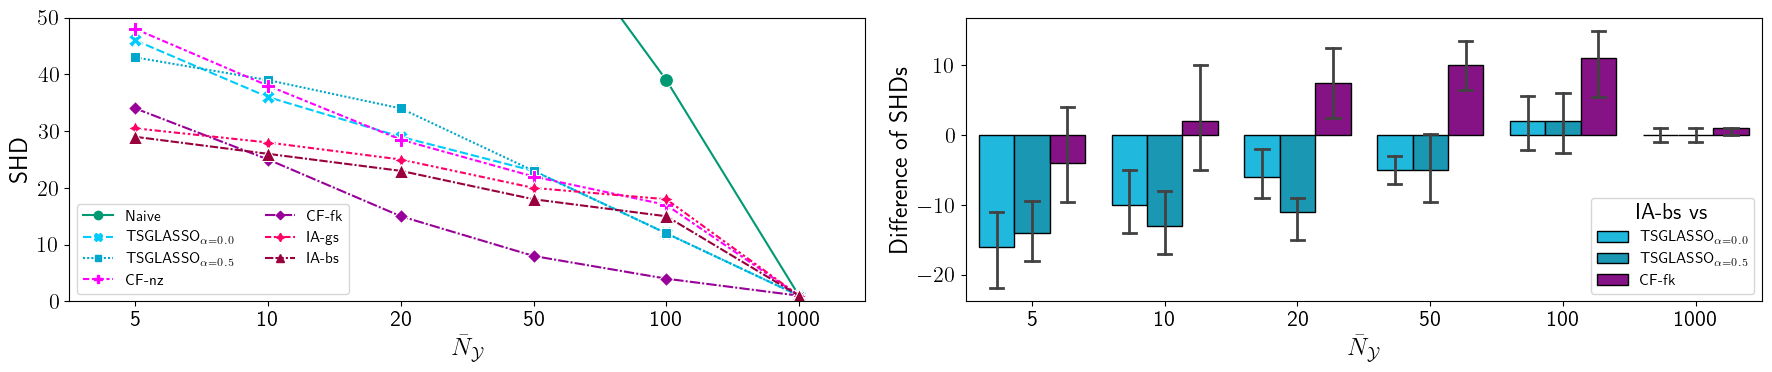

In [6]:
palette1=["#009973", "#00ccfc", "#00a7cc", "#ff00ff", "#990099", "#ff0066", "#99003d"]
palette2=["#00ccfc", "#00a7cc", "#990099"]

fig, ax = plt.subplots(1,2, sharey=False, sharex=True, figsize=(18,4))

to_plot=performances.copy()
sns.lineplot(data=to_plot, x='nsamples', y='hamming', hue='model', style='model', palette=palette1, estimator='median',  errorbar=None, markers=True, markersize=10, ax=ax[0])
sns.barplot(data=barplot_data, x='nsamples', y='delta', hue='IA-bs vs', palette=palette2, estimator='median',  errorbar=('pi',90), linewidth=1, edgecolor='0', errwidth=2, capsize=.1, ax=ax[1])

ax[1].set_xlabel(r'$\bar{N}_{\mathcal{Y}}$')
ax[1].set_ylabel(r'Difference of SHDs')
ax[0].set_xlabel(r'$\bar{N}_{\mathcal{Y}}$')
ax[0].set_ylabel(r'SHD')
ax[0].legend(loc=3,ncol=2)
ax[0].set_ylim(0,50)

plt.tight_layout()
plt.show()